<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/Fundamentals_of_Machine_Learning_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentals of Machine Learning**


**[Scikit-learn](https://github.com/scikit-learn/scikit-learn)**: In 2007, David Cournapeau developed Scikit-learn as part of the
Google summer of code project. INRIA got involved in 2010 and beta v0.1 was released
for the public. Currently there are more than 3000 plus active contributors and it has paid
sponsorship from INRIA, Python Software Foundation, Google, and Tinyclues. Many
of the functions of Scikit-learn are built upon SciPy (Scientific Python) library, and it
provides great breadth of efficiently implemented essential supervised and unsupervised
learning algorithms.


■ Note Scikit-learn is also known as sklearn in short, so these two terms are used
interchangeably throughout this book

# **Machine Learning Core Libraries**

Python's dominance in machine learning is powered by a vibrant ecosystem of open-source libraries. While a decade ago the landscape was fragmented, today it is anchored by a few powerhouse frameworks specializing in either classical machine learning or deep learning.

---

## Core Python Machine Learning & Data Science Libraries (2025)

| Project Name                  | Primary Use Case                                                               | GitHub Stars (Approx.) | License      |
| ----------------------------- | ------------------------------------------------------------------------------ | ---------------------- | ------------ |
| **Scikit-learn**              | General-purpose classical ML (regression, classification, clustering)          | 63,000+                | BSD 3-Clause |
| **TensorFlow**                | Large-scale deep learning, production deployment                               | 180,000+               | Apache 2.0   |
| **PyTorch**                   | Flexible deep learning, research, and rapid prototyping                        | 77,000+                | BSD-style    |
| **Keras**                     | High-level API for building neural networks (commonly with TensorFlow backend) | 60,000+                | Apache 2.0   |
| **Hugging Face Transformers** | State-of-the-art NLP models and transformer architectures                      | 125,000+               | Apache 2.0   |
| **XGBoost**                   | High-performance gradient boosting for structured/tabular data                 | 25,000+                | Apache 2.0   |
| **LightGBM**                  | Fast, memory-efficient gradient boosting for large-scale tabular data          | 20,000+                | MIT          |

---

## Key Shifts from the Previous Era

* **The Rise of Deep Learning Frameworks**
  TensorFlow and PyTorch now dominate tasks involving unstructured data (images, text, audio). Their ability to build and optimize deep neural networks efficiently has been revolutionary.

* **The Transformer Revolution**
  Hugging Face Transformers has democratized access to state-of-the-art NLP models, making fine-tuning and deployment of transformer architectures straightforward for practitioners.

* **Specialization in Tabular Data**
  XGBoost and LightGBM have become the standard tools for structured (tabular) datasets, providing superior performance and efficiency compared to classical models.

* **Endurance of Scikit-learn**
  Despite the rise of deep learning, Scikit-learn remains the cornerstone of classical ML due to its clean API, vast algorithm library, and unmatched documentation.

> Many libraries from the 2016 ecosystem (e.g., Pylearn2, PyBrain, NuPIC) have been largely superseded by these modern, actively maintained frameworks.

---

## A Note on Foundational Libraries

The machine learning ecosystem does not operate in isolation. All the libraries above rely on Python's **scientific computing stack**, which remains essential:

* **NumPy** → Core numerical computation (N-dimensional arrays).
* **Pandas** → Data manipulation and analysis (DataFrames, Series).
* **Matplotlib & Seaborn** → Visualization libraries for data exploration and communication.

---


# **Exploratory Data Analysis (EDA)**

EDA is all about understanding your data by employing summarizing and visualizing
techniques. At a high level the EDA can be performed in two folds, that is, univariate
analysis and multivariate analysis.


Let’s learn and consider an example dataset to learn practicality. Iris dataset is one
of a well-known datasets used extensively in pattern recognition literature. It is hosted at
UC Irvine Machine Learning Repository. The dataset contains petal length, petal width,
sepal length, and sepal width measurement for three types of iris flowers, that is, setosa,
versicolor, and virginica

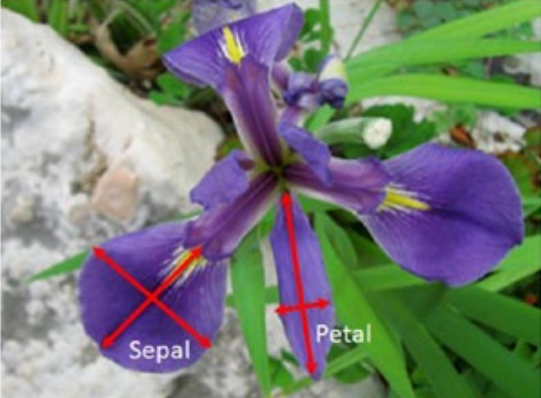

# Univariate Analysis

Individual variables are analyzed in isolation to have a better understanding about them.
Pandas provide the describe function to create summary statistics in tabular format for all
variables. These statistics are very useful for numerical types of variables to understand
any quality issues such as missing values and the presence of outliers.

In [46]:
from sklearn import datasets
import numpy as np
import pandas as pd
from rich import print # for preety outputs

iris = datasets.load_iris()

# Let's convert to dataframe
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
 columns= iris['feature_names'] + ['species'])

# replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.
species==1.0,'versicolor', 'virginica'))

# let's remove spaces from column name
iris.columns = iris.columns.str.replace(' ','')
print(iris.describe())

sepallength(cm)  sepalwidth(cm)  petallength(cm)  petalwidth(cm)
count       150.000000      150.000000       150.000000      150.000000
mean          5.843333        3.057333         3.758000        1.199333
std           0.828066        0.435866         1.765298        0.762238
min           4.300000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.300000
50%           5.800000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

The columns ‘species’ is categorical, so lets check the frequency distribution for each
category.

In [47]:
print(iris['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Pandas supports plotting functions to quick visualization on attributes. We can see
from the plot that 'species' has 3 category with 50 records each.

<Figure size 1500x800 with 0 Axes>

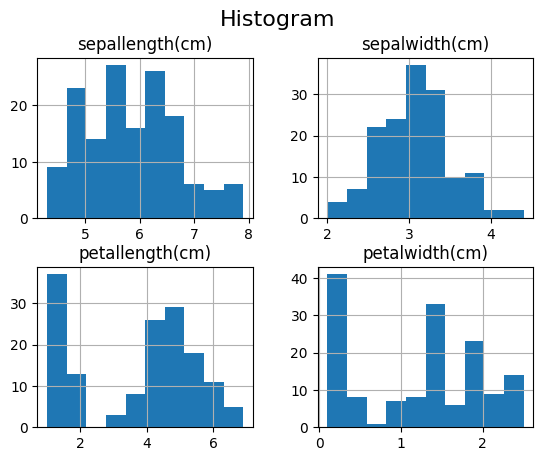

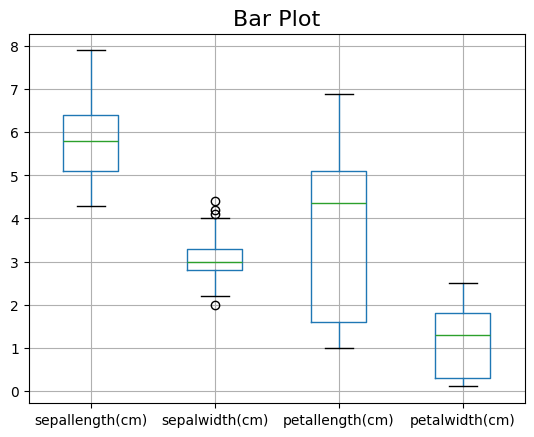

In [48]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 8))  # Set figure size
iris.hist() # plot histogram
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all sublots
plt.show()
iris.boxplot() # plot boxplot
plt.title("Bar Plot", fontsize=16)
plt.show()

# Multivariate Analysis


In multivariate analysis you try to establish a sense of relationship of all variables with
one other.
Let’s understand the mean of each feature by species type

sepallength(cm)  sepalwidth(cm)  petallength(cm)  petalwidth(cm)
species                                                                     
setosa                5.006           3.428            1.462           0.246
versicolor            5.936           2.770            4.260           1.326
virginica             6.588           2.974            5.552           2.026

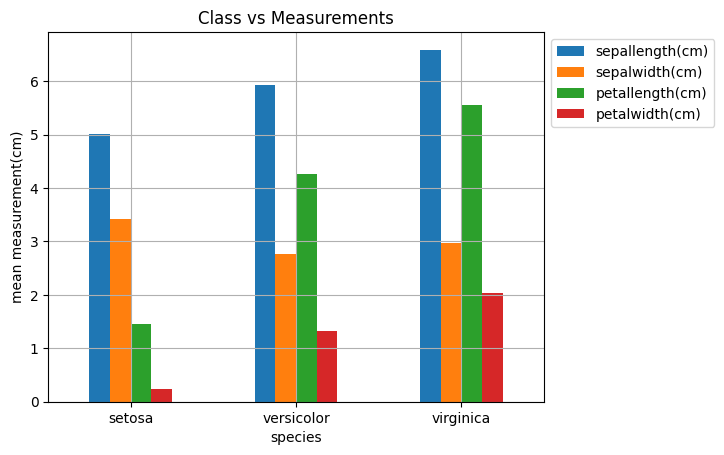

In [49]:
# print the mean for each column by species
print(iris.groupby(by = "species").mean())

# plot for mean of each feature for each label class
iris.groupby(by = "species").mean().plot(kind="bar")
plt.title('Class vs Measurements')
plt.ylabel('mean measurement(cm)')
plt.xticks(rotation=0) # manage the xticks rotation
plt.grid(True)

# Use bbox_to_anchor option to place the legend outside plot area to be tidy
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Correlation Matrix

The correlation function uses Pearson correlation coefficient, which results in a number
between -1 to 1. A strong negative relationship is indicated by a coefficient closer to -1
and a strong positive correlation is indicated by a coefficient toward 1

sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000

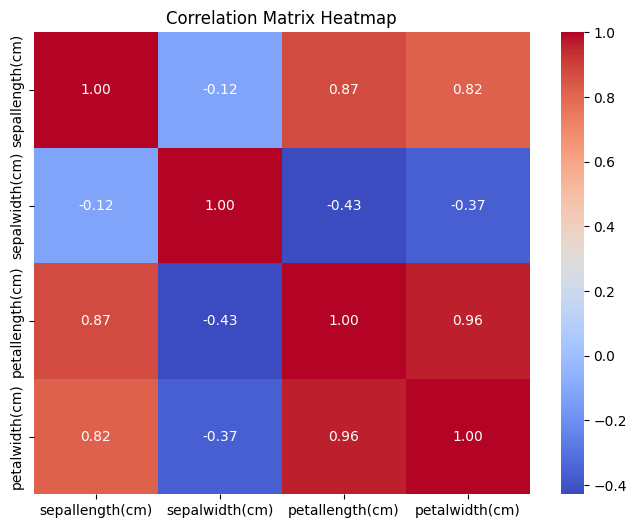

In [50]:
# create correlation matrix  (Exclude non-numeric columns when calculating correlation.)
corr = iris.select_dtypes(include='number').corr()
print(corr)

import seaborn as sns

# Plot correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pair Plot

You can understand the relationship attributes by looking at the distribution of the
interactions of each pair of attributes. This uses a built-in function to create a matrix of
scatter plots of all attributes against all attributes.

<Figure size 1000x1000 with 0 Axes>

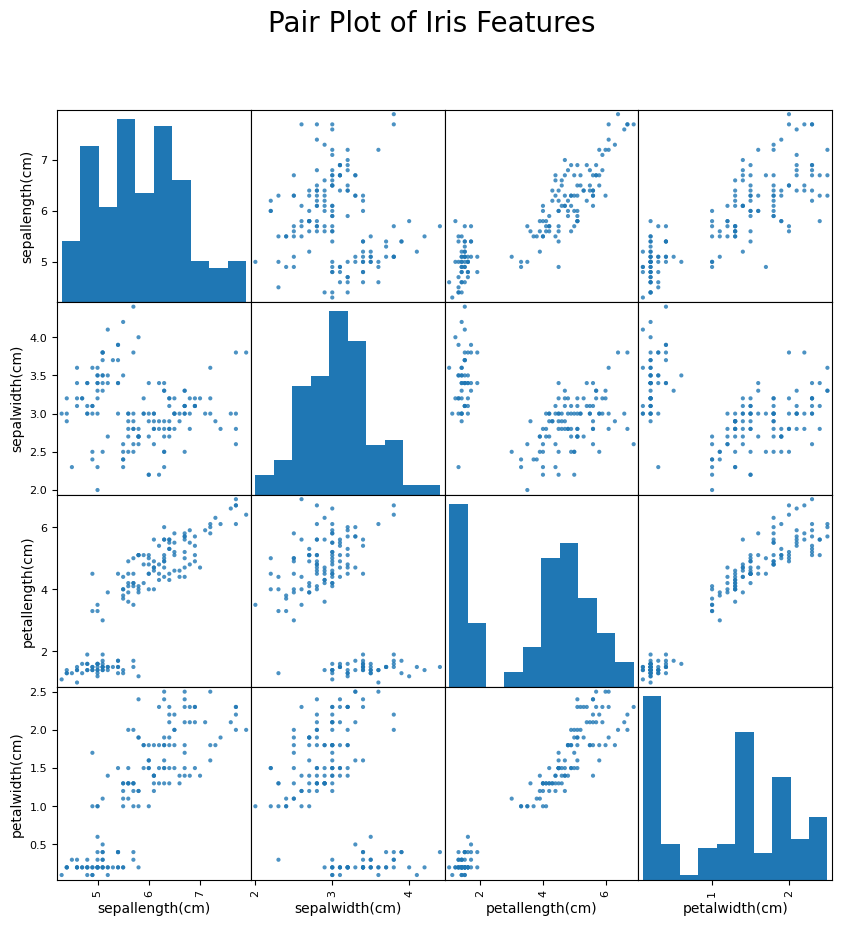

In [51]:
from pandas.plotting import scatter_matrix

# Plot scatter matrix for numeric features
plt.figure(figsize=(10, 10))
scatter_matrix(iris.select_dtypes(include='number'), figsize=(10, 10), diagonal='hist', alpha=0.8)

# Add title for all subplots
plt.suptitle("Pair Plot of Iris Features", fontsize=20)
plt.show()

# Findings from EDA

• There are no missing values.

• Sepal is longer than petal. Sepal length ranges between 4.3 to 7.9
with average length of 5.8, whereas petal length ranges between 1
to 6.9 with average length of 3.7.

• Sepal is also wider than petal. Sepal width ranges between 2 to 4.4
with a average width of 3.05, whereas petal width ranges between
0.1 to 2.5 with average width of 1.19.

• Average petal length of setosa is much smaller than versicolor and
virginica; however the average sepal width of setosa is higher than
versicolor and virginica.

• Petal length and width are strongly correlated, that is, 96% of the
time width increases with increase in length.

• Petal length has negative correlation with sepal width, that is, 42%
of the time increase in sepal width will decrease petal length.

• Initial conclusion from data: Based on length and width of sepal/
petal alone, you can conclude that versicolor/virginica might
resemble in size; however setosa characteristics seem to be
noticeably different from the other two.

Further looking at the characteristics of the three Iris flower characteristics visually
in Figure below, we can ascertain the hypothesis from our EDA

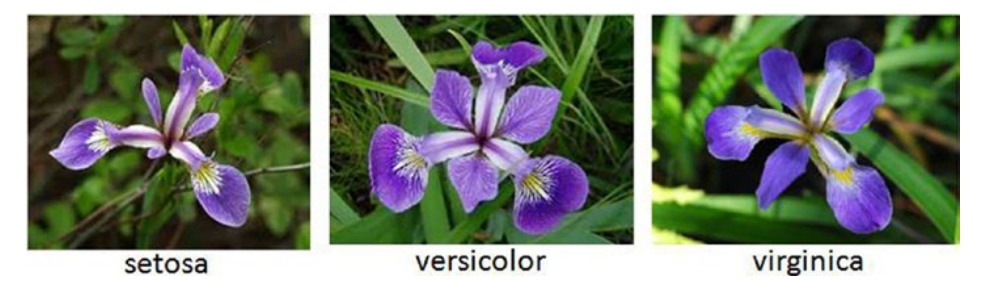

Statistics and mathematics is the base for machine learning algorithms. Let’s begin
by understanding some of the basic concepts and algorithms that are derived from the
statistical world and gradually move onto advanced machine learning algorithms.

# Supervised Learning– Regression


Can you guess what is common in the below set of business questions across different
domains?



| **Domain**             | **Question / Use Case**                                                                     | **Target (Output)**                | **Type of Supervised Learning** | **Features (Input Variables)**                                              |
| ---------------------- | ------------------------------------------------------------------------------------------- | ---------------------------------- | ------------------------------- | --------------------------------------------------------------------------- |
| Retail                 | How much will be the daily, monthly, and yearly sales for a store for the next three years? | Sales amount (numeric)             | Regression                      | Store location, previous sales, promotions, holidays, weather, footfall     |
| Retail                 | How many car parking spaces should be allocated for a retail store?                         | Number of parking spaces (numeric) | Regression                      | Store size, expected footfall, location, weekday/weekend                    |
| Manufacturing          | How much will be the product-wise manufacturing labor cost?                                 | Labor cost per product (numeric)   | Regression                      | Product type, quantity, labor hours, machine usage, shifts                  |
| Manufacturing / Retail | How much will be my monthly electricity cost for the next three years?                      | Electricity cost (numeric)         | Regression                      | Monthly production, machine usage, historical consumption, seasonal changes |
| Banking                | What is the credit score of a customer?                                                     | Credit score (numeric)             | Regression                      | Age, income, debt, repayment history, number of loans                       |
| Insurance              | How many customers will claim the insurance this year?                                      | Number of claims (numeric)         | Regression                      | Customer demographics, policy type, past claims, region, seasonality        |
| Energy / Environmental | What will be the temperature for the next five days?                                        | Temperature (numeric)              | Regression                      | Previous temperature readings, humidity, pressure, wind, season             |
| Education              | What will be the student’s test score based on study hours?                                 | Test score (numeric)               | Regression                      | Study hours, IQ, sleep hours, previous test scores                          |

---


You might have guessed it right! The presence of the words ‘how much’ and ‘how
many’ implies that the answer for these questions will be a quantitative or continuous
number. The regression is one of the fundamental techniques that will help us to find
answers to these types of questions by studying the relationship between the different
variables that are relevant to the questions that we are trying to answer.
Let’s consider a use case where we have collected students’ average test grade scores
and their respective average number of study hours for the test for group of similar IQ
students.

**Linear Regression**

Linear Regression is a fundamental supervised machine learning algorithm used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the input(s) and output, making it simple yet powerful for predicting continuous outcomes.

**Students score vs. hours studied**

In [52]:
# Create the data
data = {
    "Hours_Studied": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Test_Grade": [57, 66, 73, 76, 79, 81, 90, 96, 100]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv("student_scores.csv", index=False)

print("CSV file 'student_scores.csv' created successfully!")

CSV file 'student_scores.csv' created successfully!

Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100

Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000

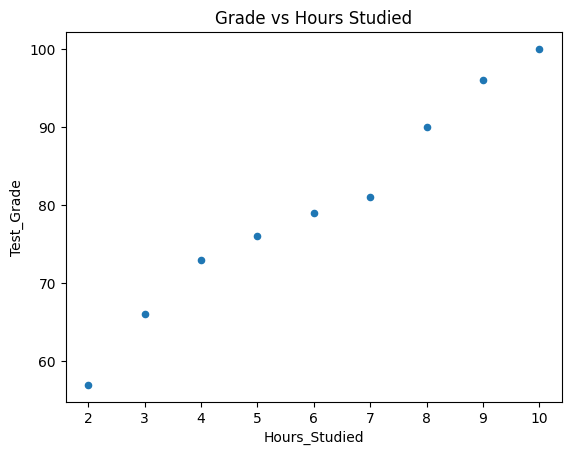

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
df = pd.read_csv('student_scores.csv')
print(df)

# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')

# check the correlation between variables
print(df.corr())

A simple scatter plot with hours studied on the x-axis and the test grades on the
y-axis shows that the grade gradually increases with the increase in hours studied. This
implies that there is a linear relationship between the two variables. Further performing
the correlation analysis shows that there is 98% positive relationship between the two
variables, which means there is 98% chance that any change in study hours will lead to a
change in grade.

# Correlation and Causation

Although correlation helps us determine the degree of relationship between two or
more variables, it does not tell about the cause and effect relationship. A high degree of
correlation does not always necessarily mean a relationship of cause and effect exists
between variables. Note that correlation does not imply causation though the existence of
causation always implies correlation. Let’s understand this better with examples.

• More firemen’s presence during a fire instance signifies that the
fire is big but the fire is not caused by firemen.

• When one sleeps with shoes on, he is likely to get a headache.
This may be due to alcohol intoxication.

The significant degree of correlation in the above examples may be due to below reasons

• Small samples are prone to show a higher correlation due to pure
chance.

• Variables may be influencing each other so it becomes hard to
designate one as the cause and the other as the effect.

• Correlated variables may be influenced by one or more other
related variables.

The domain knowledge or involvement of subject matter expert is very important to
ascertain the correlation due to causation.

# Fitting a Slope

Let’s try to fit a slope line through all the points such that the error or residual, that is, the
distance of line from each point is the best possible minimal.

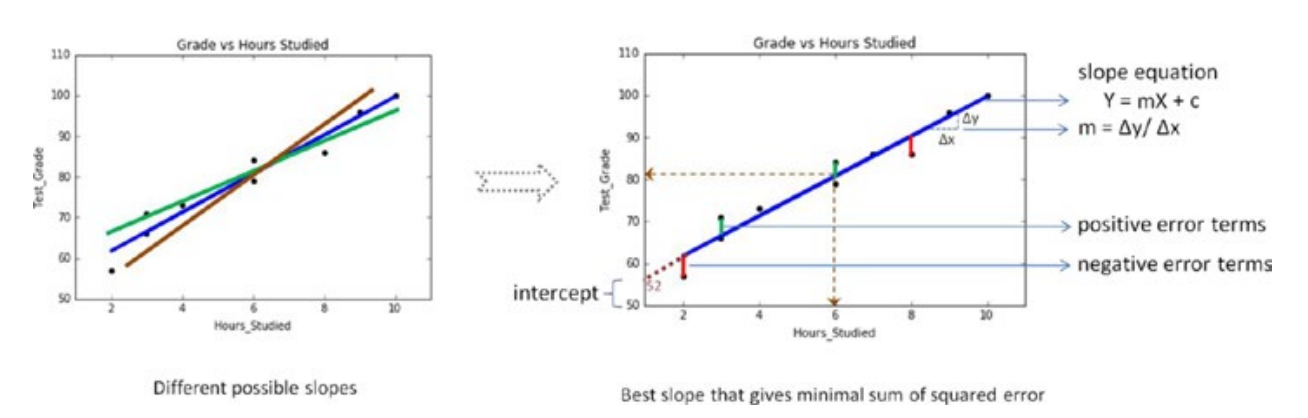

The error could be positive or negative based on its location from the slope, because
of which if we take a simple sum of all the errors, it will be zero. So we should square
the error to get rid of negativity and then sum the squared error. Hence, the slope is also referred to as least squares line.

• The slope equation is given by Y = mX + c, where Y is the
predicted value for a given x value.

• m is the change in y, divided by change in x, that is, m is the slope
of the line for the x variable and it indicates the steepness at which
it increases with every unit increase in x variable value.

• c is the intercept that indicates the location or point on the axis
where it intersects, in the case of Figure 3-5 it is 52. Intercept is a
constant that represents the variability in Y that is not explained
by the X. It is the value of Y when X is zero.

Together the slope and intercept define the linear relationship between the two
variables and can be used to predict or estimate an average rate of change. Now using
this relation, for a new student we can determine the score based on his study hours.
Say a student is planning to study an overall of 6 hours in preparation for the test. Simply
drawing a connecting line from the x-axis and y-axis to the slope shows that there is a
possibility of him scoring 80. We can use the slope equation to predict the score for any
given number of hours of study. In this case the test grade is the dependent variable,
denoted by ‘Y’ and hours studied is an independent variable or predictor, denoted by ‘X’.
Let’s use the linear regression function from the scikit-learn library to find the values of m
(x’s coefficient) and c (intercept).

Intercept: 49.67777777777776

Coefficient: [5.01666667]

Manual prediction for 6 hours: 79.77777777777777

Prediction using predict function for 6 hours: 79.77777777777777

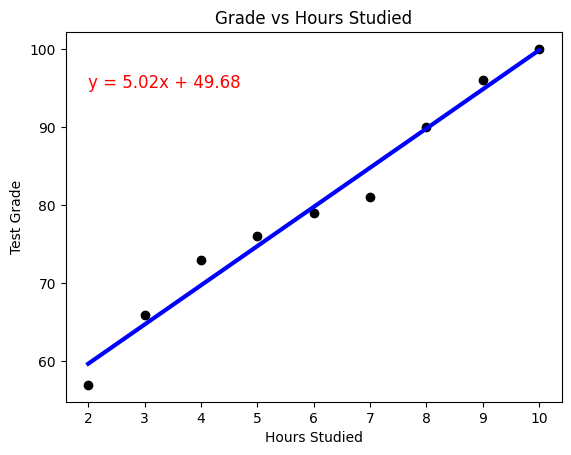

In [54]:
# Create linear regression object
lr = LinearRegression()

# Convert Series to NumPy array and reshape to 2D
x = df['Hours_Studied'].to_numpy()[:, np.newaxis]  # independent variable
y = df['Test_Grade'].to_numpy()                    # dependent variable

# Train the model
lr.fit(x, y)

# Print intercept and coefficient
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

# Manual prediction for x=6 using fitted values
manual_prediction = lr.intercept_ + lr.coef_[0]*6
print("Manual prediction for 6 hours:", manual_prediction)

# Predict using the built-in function (must be 2D)
x_test = np.array([[6]])
predicted = lr.predict(x_test)
print("Prediction using predict function for 6 hours:", predicted[0])

# Plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Test Grade')

# Add regression equation on plot
plt.text(2, 95, f"y = {lr.coef_[0]:.2f}x + {lr.intercept_:.2f}", color='red', fontsize=12)

plt.show()

Let’s put the appropriate values in the slope equation (m * X + c = Y), 4.74260355 *
6 + 52.2928994083 = 80.74 that means a student studying 6 hours has the probability of
scoring 80.74 test grade.

Note that if X is zero, the value of Y will be 52.29 that mean even if the student does
not study there is a possibility that he’ll score 52.29; this signifies that there are other
variables that have a causation effect on score that we currently do not have access to.

**How Good Is Your Model?**

There are three metrics widely used for evaluating linear model performance.

• R-squared

• RMSE

• MAE

# R-Squared for Goodness of Fit

The R-squared metric is the most popular practice of evaluating how well your model fits
the data. R-squared value designates the total proportion of variance in the dependent
variable explained by the independent variable. It is a value between 0 and 1; the value
toward 1 indicates a better model fit.

In [55]:
# R-squared using built-in method
r_squared = lr.score(x, y)
print("R-squared value:", r_squared)

R-squared value: 0.9757431074095347

Our model gives R-squared = 0.9757, it means 97.57% of the variation in test grades is explained by hours studied, indicating an excellent model fit.

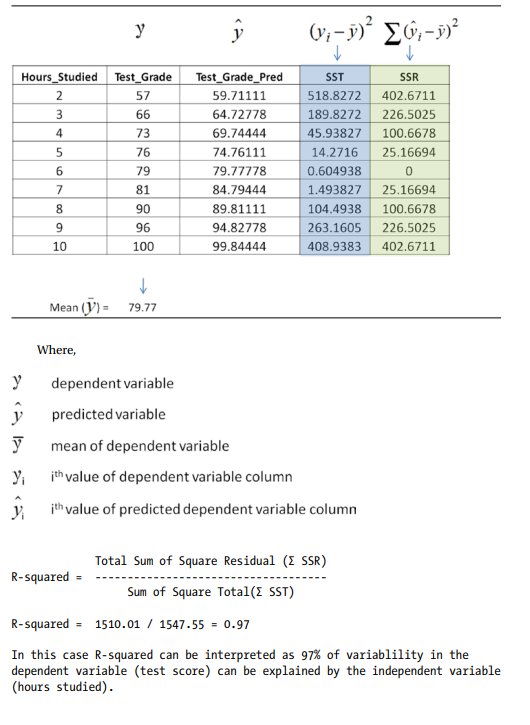

# Root Mean Squared Error (RMSE)

This is the square root of the mean of the squared errors. RMSE indicates how close the
predicted values are to the actual values; hence a lower RMSE value signifies that the
model performance is good. One of the key properties of RMSE is that the unit will be the
same as the target variable

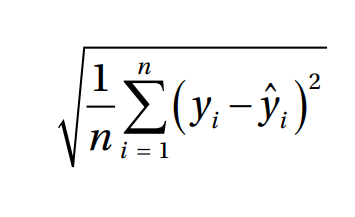

# Mean Absolute Error

This is the mean or average of absolute value of the errors, that is, the predicted - actual.

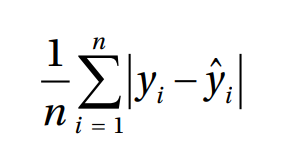

Linear regression model accuracy matrices

In [61]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Add predicted values to dataframe
df['Test_Grade_Pred'] = lr.predict(x)
print(df)
print("=======================================================================")
# Manual calculation of R-squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())

print("Sum of SSR:", df['SSR'].sum())
print("Sum of SST:", df['SST'].sum())
print("R-squared (manual):", df['SSR'].sum() / df['SST'].sum())

# Using built-in function
print("R-squared (sklearn):", r2_score(df['Test_Grade'], df['Test_Grade_Pred']))
print("Mean Absolute Error (MAE):", mean_absolute_error(df['Test_Grade'], df['Test_Grade_Pred']))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(df['Test_Grade'], df['Test_Grade_Pred'])))

Hours_Studied  Test_Grade  Test_Grade_Pred         SST         SSR
0              2          57        59.711111  518.827160  402.671111
1              3          66        64.727778  189.827160  226.502500
2              4          73        69.744444   45.938272  100.667778
3              5          76        74.761111   14.271605   25.166944
4              6          79        79.777778    0.604938    0.000000
5              7          81        84.794444    1.493827   25.166944
6              8          90        89.811111  104.493827  100.667778
7              9          96        94.827778  263.160494  226.502500
8             10         100        99.844444  408.938272  402.671111

=======================================================================

Sum of SSR: 1510.0166666666673

Sum of SST: 1547.5555555555557

R-squared (manual): 0.9757431074095351

R-squared (sklearn): 0.9757431074095347

Mean Absolute Error (MAE): 1.618518518518523

Root Mean Squared Error (RMSE): 2.0422995995497297



---



# **Polynomial Regression**

**Polynomial Regression** is a type of regression where the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an **nth-degree polynomial**. While it is still considered a linear model in terms of coefficients, it can capture **non-linear trends** in the data.

**Equation (for degree n):**

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \epsilon
$$

Where:

* $y$ = dependent variable
* $x$ = independent variable
* $\beta_0, \beta_1, ..., \beta_n$ = coefficients
* $n$ = degree of the polynomial
* $\epsilon$ = error term

---

## **Example: Predicting Test Scores**

Suppose we want to predict a student's test grade based on hours studied, but the relationship is **non-linear**.


Intercept: 48.94761904761886

Coefficients: [ 0.          5.31536797 -0.02489177]

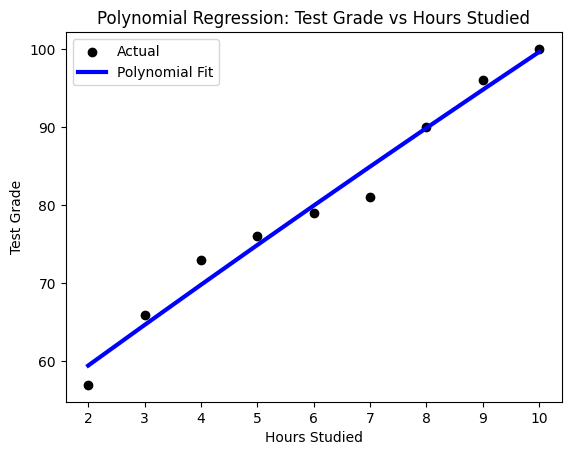

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Sample data
data = {
    'Hours_Studied': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Test_Grade': [57, 66, 73, 76, 79, 81, 90, 96, 100]
}
df = pd.DataFrame(data)

# Independent and dependent variables
X = df['Hours_Studied'].values.reshape(-1, 1)
y = df['Test_Grade'].values

# Transform to polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict
y_pred = model.predict(X_poly)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Plotting
plt.scatter(X, y, color='black', label='Actual')
plt.plot(X, y_pred, color='blue', linewidth=3, label='Polynomial Fit')
plt.title("Polynomial Regression: Test Grade vs Hours Studied")
plt.xlabel("Hours Studied")
plt.ylabel("Test Grade")
plt.legend()
plt.show()


**Explanation:**

* We use `PolynomialFeatures(degree=2)` to introduce $x^2$ as a new feature.
* The model now fits a **curve** instead of a straight line, capturing non-linear trends.
* You can increase the degree for higher flexibility, but beware of **overfitting**.

---

# **Multivariate Regression**

So far we have seen simple regression with one independent variable for a given
dependent variable. In most of the real-life use cases there will be more than one
independent variable, so the concept of having multiple independent variables is called
multivariate regression. The equation takes the form below.

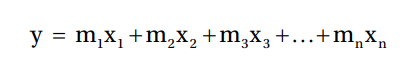

Here, each independent variable is represented by x’s, and m’s are the corresponding
coefficients.

**Example: Predicting House Prices**

Suppose we want to predict the price of a house (Price) based on:

* Size of the house in square feet (Size)

* Number of bedrooms (Bedrooms)

* Age of the house (Age)

In [66]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data
housedata = {
    'Size': [1500, 1800, 2400, 3000, 3500],
    'Bedrooms': [3, 4, 3, 5, 4],
    'Age': [10, 15, 20, 5, 8],
    'Price': [400000, 500000, 600000, 650000, 700000]
}

df = pd.DataFrame(housedata)

# Independent variables
X = df[['Size', 'Bedrooms', 'Age']]

# Dependent variable
y = df['Price']

# Train model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(X.columns, model.coef_)))

# Predict price for a new house
new_house = pd.DataFrame({'Size':[2500], 'Bedrooms':[4], 'Age':[10]})
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price[0])


Intercept: 24037.908107574214

Coefficients:
[
    ('Size', np.float64(144.61397241242327)),
    ('Bedrooms', np.float64(30649.995038205845)),
    ('Age', np.float64(6606.380867321623))
]

Predicted Price: 574236.627964672

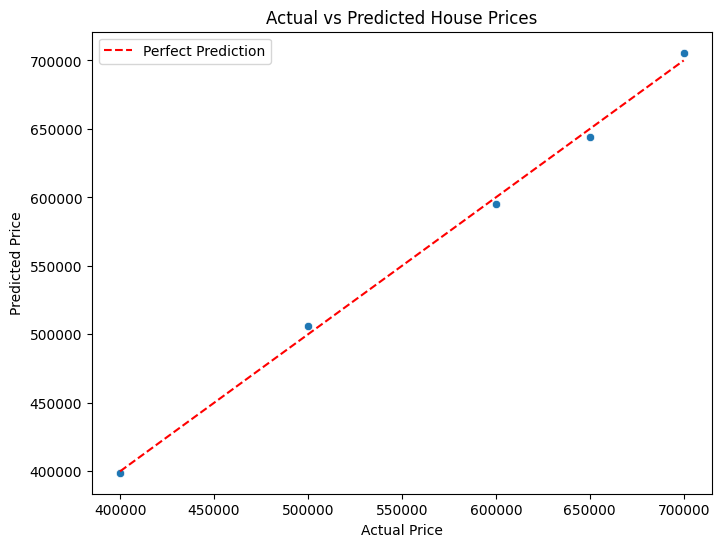

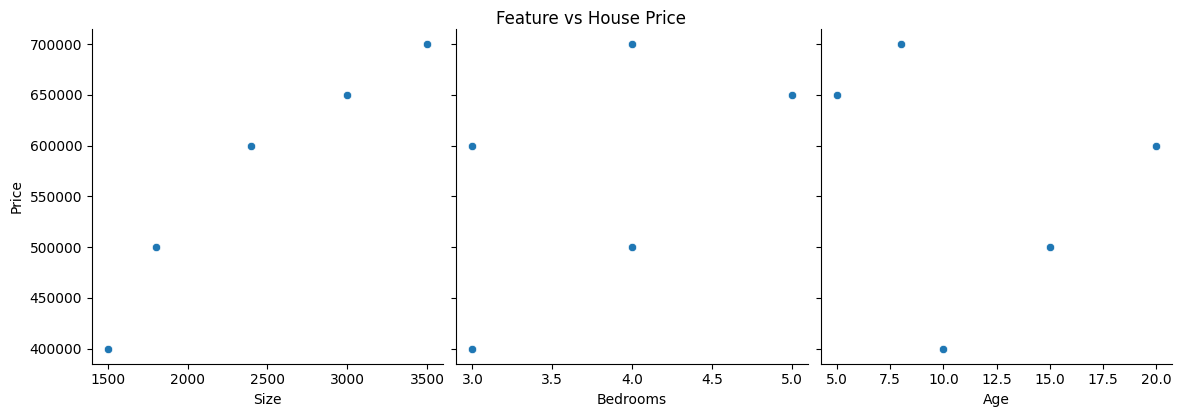

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add predicted prices to the dataframe
df['Predicted_Price'] = model.predict(X)

# 1. Plot actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Price'], y=df['Predicted_Price'])
plt.plot([df['Price'].min(), df['Price'].max()],
         [df['Price'].min(), df['Price'].max()],
         color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

# 2. Pairplot to show each feature vs Price
sns.pairplot(df, x_vars=['Size', 'Bedrooms', 'Age'], y_vars='Price', height=4, kind='scatter')
plt.suptitle('Feature vs House Price', y=1.02)
plt.show()